# Faith vs. Modernity: Predicting Liberal Values based on Religiosity

### Open Data

In [11]:
# Unzip the file the first time you run the code

# import zipfile
#
# with zipfile.ZipFile("compressed_data/ZA7570_v2-1-0.sav.zip", 'r') as zip_ref:
#     zip_ref.extractall("data/")

import pyreadstat
import pandas as pd

df, meta = pyreadstat.read_sav("data/ZA7570_v2-1-0.sav")


# Map column name to question

# variable_map = []
# for col_name, label in zip(meta.column_names, meta.column_labels):
#     variable_map.append({"Variable": col_name, "Label": label})
#
# map_df = pd.DataFrame(variable_map)
# map_df.to_csv("data/ZA7570_variables.csv", index=False)

### Demographic Exploration


COUNTRY DISTRIBUTION
c_alphan
ZA        2736
CH        2350
TW        1842
SE        1777
ES        1733
DE        1724
DK        1631
RU        1583
GB-GBN    1552
TH        1535
Name: count, dtype: int64
Total countries: 33


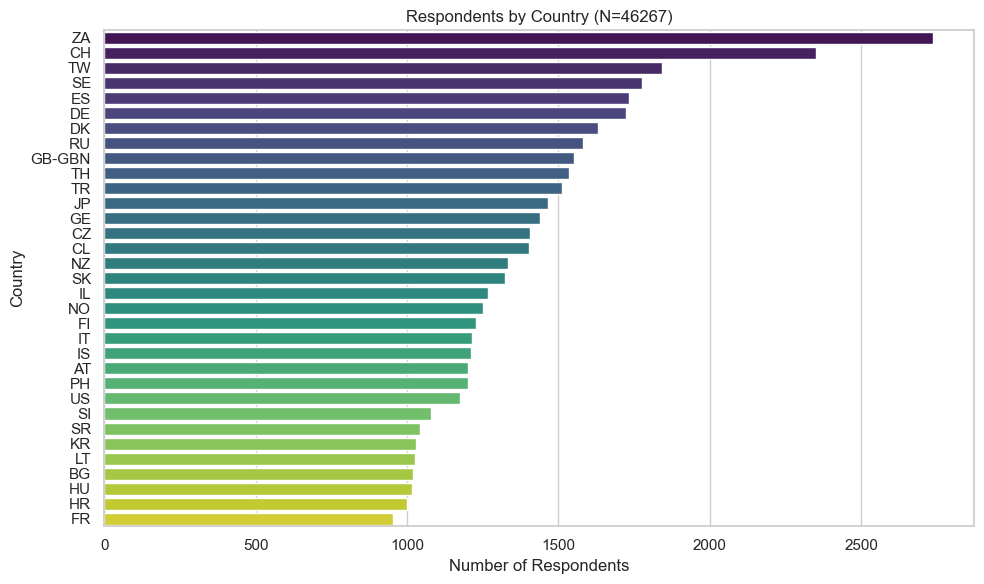


CONTINENT DISTRIBUTION
c_alphan
Europe           27284
Asia             11292
Africa            2736
South America     2446
Oceania           1334
North America     1175


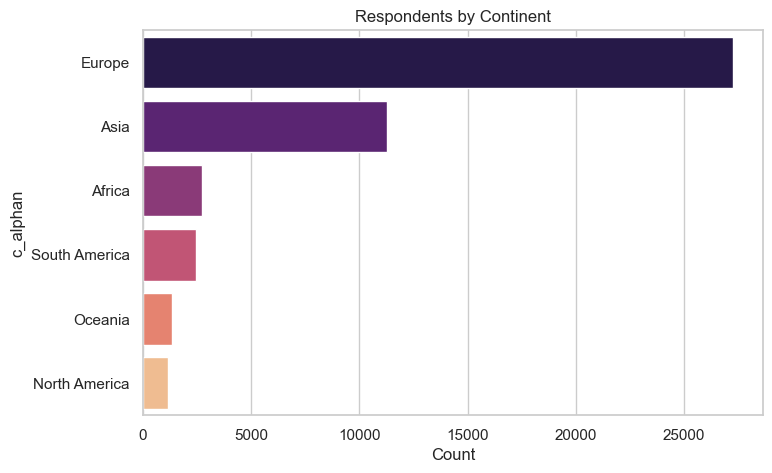


AGE DISTRIBUTION
count    46098.0
mean        49.0
std         17.6
min         15.0
25%         35.0
50%         49.0
75%         63.0
max        105.0
Name: AGE, dtype: float64


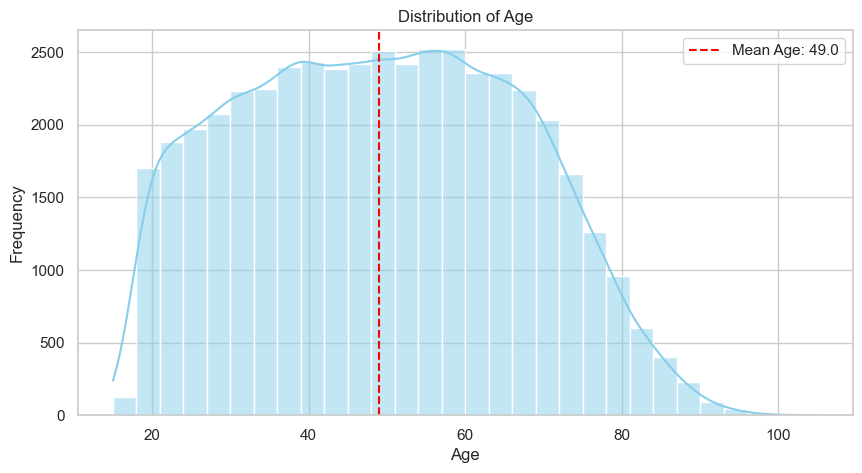


GENDER DISTRIBUTION
SEX
Female    24966
Male      21252
Name: count, dtype: int64


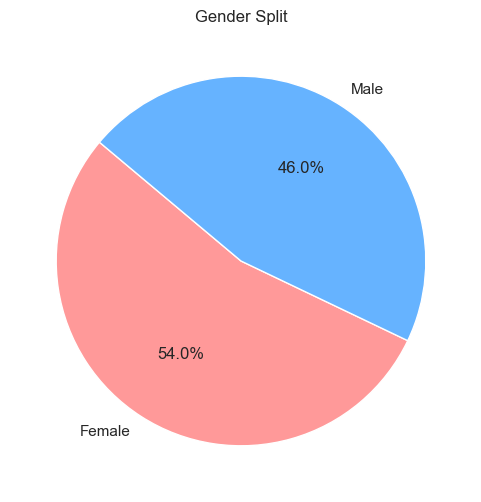


RELIGION (Grouped)
RELIGGRP
No religion                       25.4%
Catholic                          24.7%
Protestant                        19.9%
Orthodox                           7.5%
Islamic                            5.9%
Buddhist                           5.6%
Other Christian, NZ: Christian     4.1%
Other Asian Religions              2.8%
Jewish                             2.4%
Other Religions                    1.1%
Hindu                              0.7%
Name: proportion, dtype: object


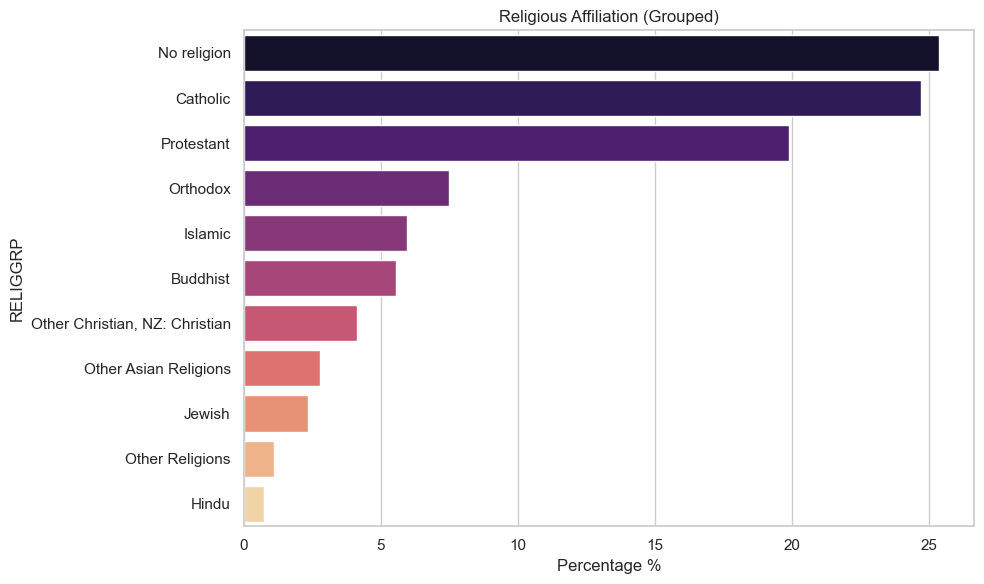


EDUCATION LEVEL
DEGREE
Upper secondary (programs that allow entry to university)                                                        26.0%
Lower secondary (secondary completed that does not allow entry to university: end of obligatory school)          21.5%
Lower level tertiary, first stage (also technical schools at a tertiary level)                                   17.4%
Post secondary, non-tertiary (other upper secondary programs toward the labour market or technical formation)    13.5%
Upper level tertiary (Master, Doctor)                                                                            11.2%
Primary school (elementary education)                                                                             7.2%
No formal education                                                                                               3.2%
Name: proportion, dtype: object


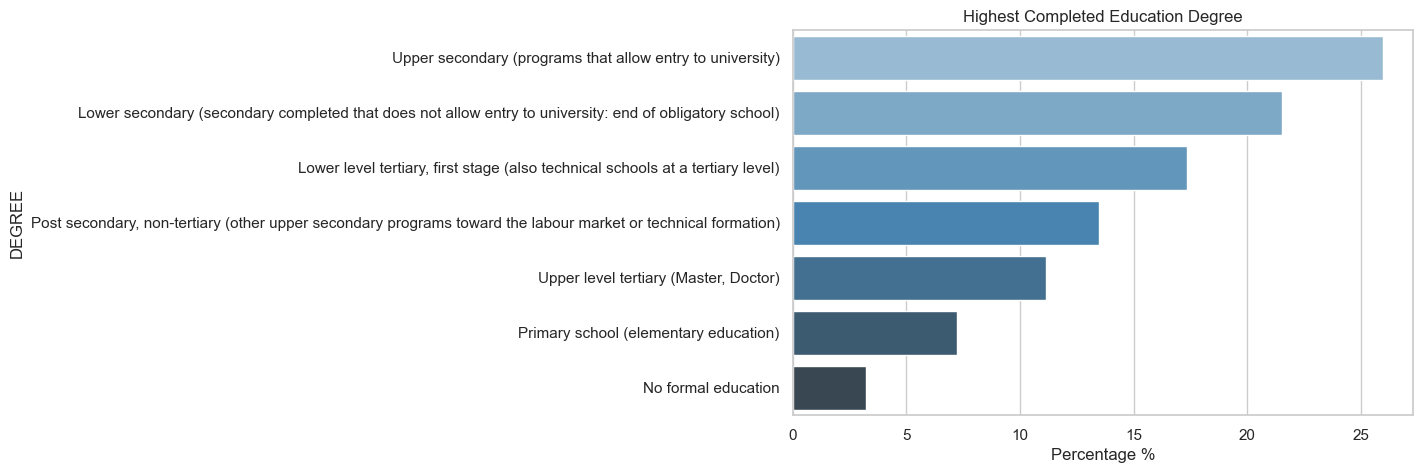


WORK STATUS
WORK
I am currently in paid work                                        25493
I am currently not in paid work but I had paid work in the past    15180
I have never had paid work                                          4831
Name: count, dtype: int64


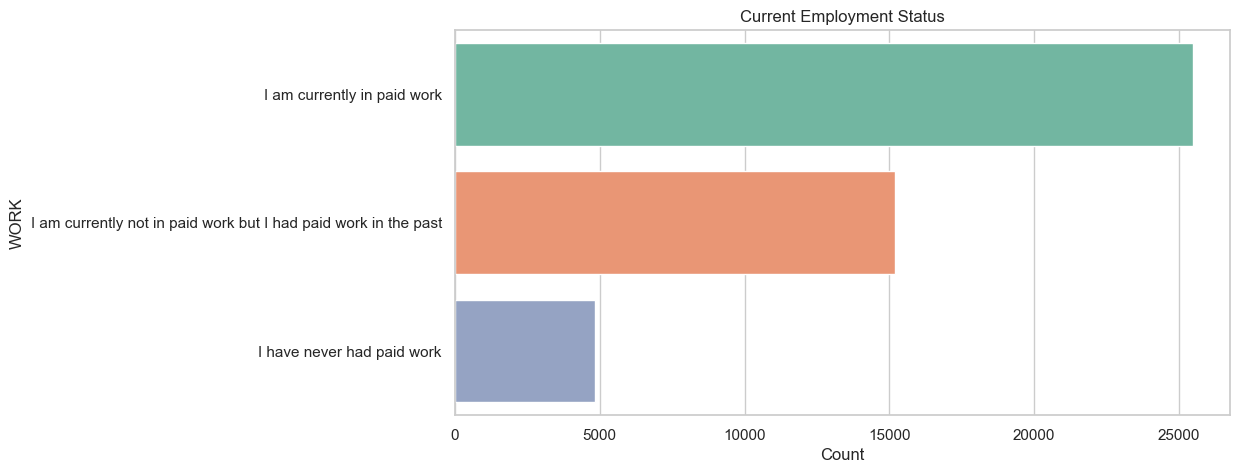

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid")

def get_labeled_series(df, meta, var_name):
    """
    Gets a column and maps its numeric codes to text labels.
    """
    if var_name not in df.columns:
        return None

    series = df[var_name]

    if meta and var_name in meta.variable_value_labels:
        mapping = meta.variable_value_labels[var_name]
        return series.map(mapping)

    return series

def analyze_continent(df, meta):
    print("\n" + "="*40)
    print("CONTINENT DISTRIBUTION")
    print("="*40)

    if 'c_alphan' not in df.columns:
        print("Variable 'c_alphan' (Country ISO Codes) is missing. Cannot map continents.")
        return

    country_codes = df['c_alphan']

    continent_map = {
        'AT': 'Europe', 'BG': 'Europe', 'CH': 'Europe', 'CZ': 'Europe',
        'DE': 'Europe', 'DK': 'Europe', 'ES': 'Europe', 'FI': 'Europe',
        'FR': 'Europe', 'GB-GBN': 'Europe', 'GB': 'Europe', 'HR': 'Europe',
        'HU': 'Europe', 'IS': 'Europe', 'IT': 'Europe', 'LT': 'Europe',
        'NO': 'Europe', 'SE': 'Europe', 'SI': 'Europe', 'SK': 'Europe',
        'RU': 'Europe',
        'JP': 'Asia', 'KR': 'Asia', 'PH': 'Asia', 'TH': 'Asia',
        'TW': 'Asia', 'IL': 'Asia', 'TR': 'Asia', 'GE': 'Asia',
        'US': 'North America', 'CL': 'South America', 'SR': 'South America',
        'ZA': 'Africa', 'NZ': 'Oceania', 'AU': 'Oceania'
    }

    continent_series = country_codes.map(continent_map)
    continent_series = continent_series.fillna('Other')
    cont_counts = continent_series.value_counts()
    print(cont_counts.to_string())

    plt.figure(figsize=(8, 5))
    sns.barplot(x=cont_counts.values, y=cont_counts.index, hue=cont_counts.index, palette="magma", legend=False)
    plt.title("Respondents by Continent")
    plt.xlabel("Count")
    plt.show()

def analyze_country(df, meta):
    print("\n" + "="*40)
    print("COUNTRY DISTRIBUTION")
    print("="*40)

    var = 'c_alphan' if 'c_alphan' in df.columns else 'country'
    data = get_labeled_series(df, meta, var)

    if data is None: return

    counts = data.value_counts()
    print(counts.head(10))
    print(f"Total countries: {len(counts)}")

    plt.figure(figsize=(10, 6))
    sns.barplot(y=counts.index, x=counts.values, hue=counts.index, palette="viridis", legend=False)
    plt.title(f"Respondents by Country (N={len(df)})")
    plt.xlabel("Number of Respondents")
    plt.ylabel("Country")
    plt.tight_layout()
    plt.show()

def analyze_age(df):
    print("\n" + "="*40)
    print("AGE DISTRIBUTION")
    print("="*40)

    if 'AGE' not in df.columns:
        print("Variable 'AGE' not found.")
        return

    valid_ages = df['AGE'][df['AGE'] < 120]

    print(valid_ages.describe().round(1))

    plt.figure(figsize=(10, 5))
    sns.histplot(valid_ages, bins=30, kde=True, color="skyblue")
    plt.title("Distribution of Age")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.axvline(valid_ages.mean(), color='red', linestyle='--', label=f'Mean Age: {valid_ages.mean():.1f}')
    plt.legend()
    plt.show()

def analyze_gender(df, meta):
    print("\n" + "="*40)
    print("GENDER DISTRIBUTION")
    print("="*40)

    data = get_labeled_series(df, meta, 'SEX')
    if data is None: return

    counts = data.value_counts()
    print(counts)

    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
    plt.title("Gender Split")
    plt.show()

def analyze_religion(df, meta):
    print("\n" + "="*40)
    print("RELIGION (Grouped)")
    print("="*40)

    data = get_labeled_series(df, meta, 'RELIGGRP')
    if data is None: return

    counts = data.value_counts(normalize=True) * 100
    print(counts.round(1).astype(str) + '%')

    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts.values, y=counts.index, hue=counts.index, palette="magma", legend=False)
    plt.title("Religious Affiliation (Grouped)")
    plt.xlabel("Percentage %")
    plt.tight_layout()
    plt.show()

def analyze_education(df, meta):
    print("\n" + "="*40)
    print("EDUCATION LEVEL")
    print("="*40)

    data = get_labeled_series(df, meta, 'DEGREE')
    if data is None: return

    counts = data.value_counts(normalize=True) * 100
    print(counts.round(1).astype(str) + '%')

    plt.figure(figsize=(8, 5))
    sns.barplot(x=counts.values, y=counts.index, hue=counts.index, palette="Blues_d", legend=False)
    plt.title("Highest Completed Education Degree")
    plt.xlabel("Percentage %")
    plt.show()

def analyze_work_status(df, meta):
    print("\n" + "="*40)
    print("WORK STATUS")
    print("="*40)

    data = get_labeled_series(df, meta, 'WORK')
    if data is None: return

    counts = data.value_counts()
    print(counts)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=counts.values, y=counts.index, hue=counts.index, palette="Set2", legend=False)
    plt.title("Current Employment Status")
    plt.xlabel("Count")
    plt.show()

def explore_all_demographics(df, meta):
    analyze_country(df, meta)
    analyze_continent(df, meta)
    analyze_age(df)
    analyze_gender(df, meta)
    analyze_religion(df, meta)
    analyze_education(df, meta)
    analyze_work_status(df, meta)


explore_all_demographics(df, meta)

#### Conclusion About the Demographics

- There are countries from all over the world but Europe has the largest portion of the countries
- Christianity dominates the religion with around 56% of the religions, probably due to the European majority
- Gender distributes close to equal
- Relatively mature people, mean age is 49
- Majority of working people with around 55% and another 33% which worked in the past or retired
- Mostly educated people, 68% finished high school, 28% with degree and only 3.2% without formal education

## Research Question:
To what extent does an individual's level of religiosity predict their stance on controversial moral issues (such as abortion and homosexuality), compared to demographic factors like age and education?


## Data Preparation & Feature Engineering


**Our goals are:**

    - Identify and Rename Variables: Map cryptic column names (e.g., v37, v62) to meaningful labels like Opinion_Homosexuality and Freq_Prayer.

    - Handle Missing Values: Clean the data by converting invalid codes (e.g., negative values, "Don't know") to NaN and removing incomplete rows.

    - Create Composite Indices: Construct the key variables for our research:

        Religiosity_Index: A combined score of prayer frequency and religious attendance (adjusted so higher values indicate higher religiosity).

        Liberalism_Index: A combined score of attitudes toward abortion and homosexuality (higher values indicate more liberal views).

Detected Columns -> Age: AGE, Sex: SEX, Education: DEGREE
Original size: 46267
Cleaned size: 33824

Sample of processed data:
   Opinion_Homosexuality  Opinion_Abortion  Freq_Prayer  Freq_Attendance  \
0                    1.0               8.0          1.0              5.0   
2                    4.0               7.0          5.0              1.0   
3                    6.0               6.0          1.0              1.0   
4                    6.0               7.0          2.0              2.0   
5                    6.0               8.0          1.0              1.0   

    Age  Gender  Education  Religiosity_Index  Liberalism_Index  
0  57.0     1.0        2.0                8.0               4.5  
2  58.0     1.0        2.0                8.0               5.5  
3  28.0     1.0        2.0               10.0               6.0  
4  48.0     1.0        2.0                9.0               6.5  
5  35.0     1.0        2.0               10.0               7.0  


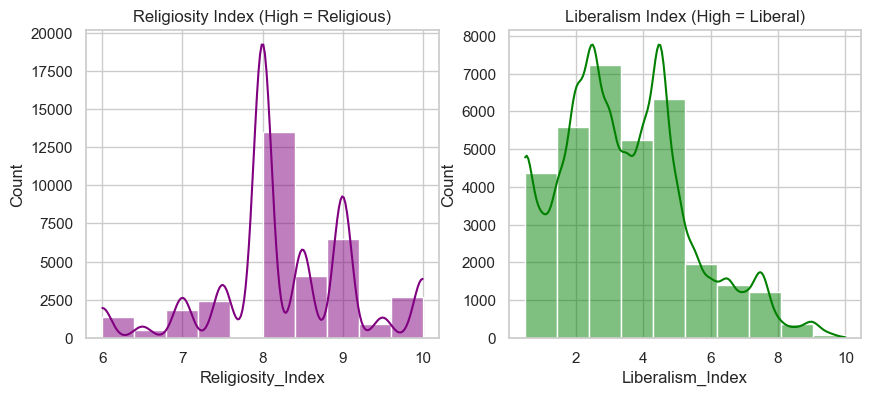

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Detect actual column names (handling case sensitivity)
def get_col_name(df, possible_names):
    for col in df.columns:
        if col in possible_names or col.upper() in possible_names:
            return col
    return None

real_age = get_col_name(df, ['age', 'AGE', 'Age'])
real_sex = get_col_name(df, ['sex', 'SEX', 'Gender', 'v200'])
real_edu = get_col_name(df, ['degree', 'DEGREE', 'education', 'v_edu'])

print(f"Detected Columns -> Age: {real_age}, Sex: {real_sex}, Education: {real_edu}")

# 2. Map raw variables to meaningful names
# v37: Homosexuality, v40: Abortion, v62: Prayer, v61: Attendance
rename_map = {
    'v37': 'Opinion_Homosexuality',
    'v40': 'Opinion_Abortion',
    'v62': 'Freq_Prayer',
    'v61': 'Freq_Attendance',
    real_age: 'Age',
    real_sex: 'Gender',
    real_edu: 'Education'
}
# Filter map to include only existing columns
rename_map = {k: v for k, v in rename_map.items() if k is not None}

# Create analysis dataframe
cols_to_use = [c for c in rename_map.keys() if c in df.columns]
df_analysis = df[cols_to_use].rename(columns=rename_map)

# 3. Data Cleaning
# Replace negative values (SPSS missing codes) and out-of-range values with NaN
for col in df_analysis.columns:
    df_analysis.loc[df_analysis[col] < 0, col] = np.nan

if 'Freq_Prayer' in df_analysis.columns:
    df_analysis.loc[df_analysis['Freq_Prayer'] > 20, 'Freq_Prayer'] = np.nan
if 'Freq_Attendance' in df_analysis.columns:
    df_analysis.loc[df_analysis['Freq_Attendance'] > 20, 'Freq_Attendance'] = np.nan
if 'Opinion_Homosexuality' in df_analysis.columns:
    df_analysis.loc[df_analysis['Opinion_Homosexuality'] > 10, 'Opinion_Homosexuality'] = np.nan

# 4. Feature Engineering (Creating Indices)
# Religiosity Index: Invert scale (11 - X) so higher value = more religious
if 'Freq_Prayer' in df_analysis.columns and 'Freq_Attendance' in df_analysis.columns:
    df_analysis['Religiosity_Index'] = 11 - ((df_analysis['Freq_Prayer'] + df_analysis['Freq_Attendance']) / 2)

# Liberalism Index: Average of moral opinions (Higher = More Liberal)
if 'Opinion_Homosexuality' in df_analysis.columns and 'Opinion_Abortion' in df_analysis.columns:
    df_analysis['Liberalism_Index'] = (df_analysis['Opinion_Homosexuality'] + df_analysis['Opinion_Abortion']) / 2

# Final cleanup: Drop rows with missing values
df_clean = df_analysis.dropna()

print(f"Original size: {len(df)}")
print(f"Cleaned size: {len(df_clean)}")

if not df_clean.empty:
    print("\nSample of processed data:")
    print(df_clean.head())

    # Visualization check
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df_clean['Religiosity_Index'], bins=10, color='purple', kde=True)
    plt.title('Religiosity Index (High = Religious)')

    plt.subplot(1, 2, 2)
    sns.histplot(df_clean['Liberalism_Index'], bins=10, color='green', kde=True)
    plt.title('Liberalism Index (High = Liberal)')
    plt.show()
else:
    print("\n Error: The cleaned dataframe is empty.")

In [38]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

df_scaled = df_model.copy()
features_to_scale = ['Religiosity_Index', 'Age', 'Education']

scaler = StandardScaler()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])

### Statistical Validity Check: Multicollinearity
Before running our Linear Regression model, we must ensure that our independent variables (Age, Education, Religiosity, Gender) are not too highly correlated with each other (a phenomenon known as Multicollinearity). High correlation would make it difficult to determine the individual effect of each predictor.

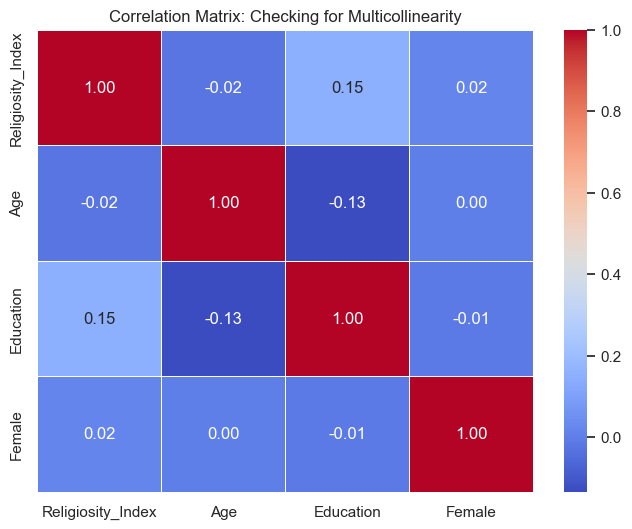

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

df_check = df_clean.copy()

if 'Female' not in df_check.columns and 'Gender' in df_check.columns:
    df_check['Female'] = (df_check['Gender'] == 2).astype(int)

predictors = ['Religiosity_Index', 'Age', 'Education', 'Female']
cols_to_use = [col for col in predictors if col in df_check.columns]

corr_matrix = df_check[cols_to_use].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Checking for Multicollinearity")
plt.show()

**Conclusion from the Heatmap:**
The correlation matrix shows low to moderate correlations between the features (all values are well below the threshold of 0.7). This confirms that our predictors are distinct and independent, ensuring the reliability of our subsequent regression coefficients.

## Linear Regression Analysis

Goals:
- Correlation Check: Visualize raw relationships between variables.

- Simple Regression: Test if Religiosity predicts Liberalism on its own.

- Multivariate Regression: Test if the connection holds when controlling for Age, Gender, and Education.

- Feature Importance: Compare standardized coefficients to see which factor (Religion vs. Education vs. Age) has the strongest impact on moral views.

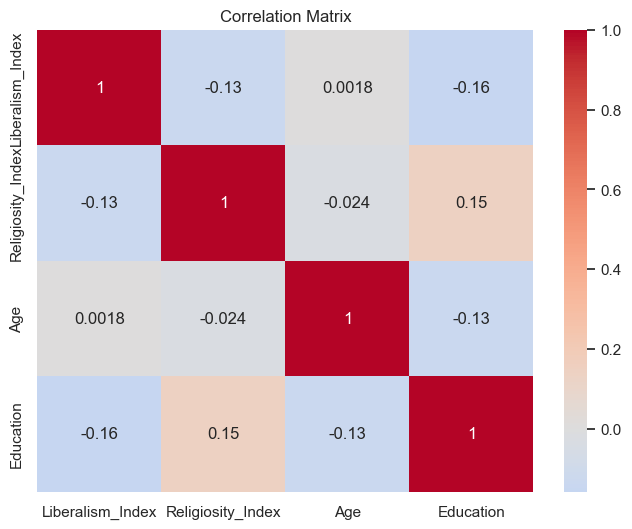


--- Model 1: Simple Regression (Religiosity -> Liberalism) ---
                            OLS Regression Results                            
Dep. Variable:       Liberalism_Index   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     587.6
Date:                Mon, 19 Jan 2026   Prob (F-statistic):          1.07e-128
Time:                        16:22:46   Log-Likelihood:                -69634.
No. Observations:               33824   AIC:                         1.393e+05
Df Residuals:                   33822   BIC:                         1.393e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

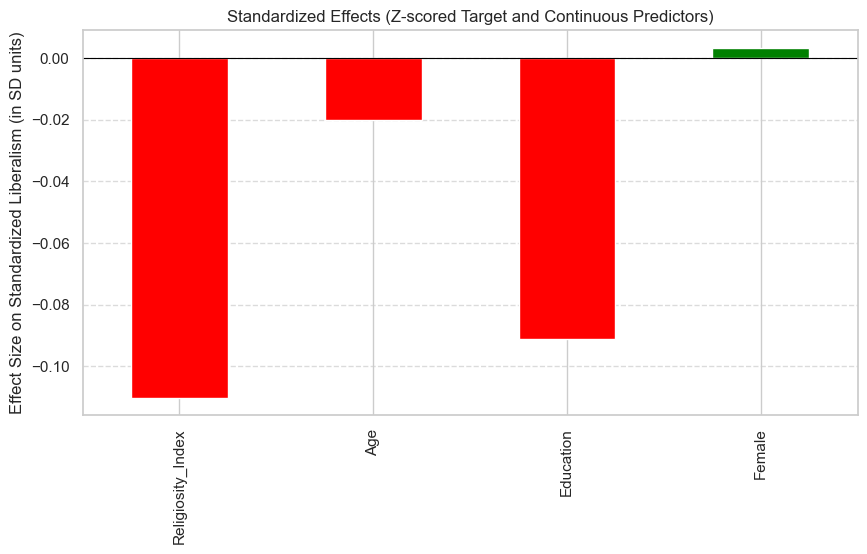

In [58]:
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Prepare Data for Regression
df_reg = df_clean.copy()

# Convert Gender to Binary (0=Male, 1=Female) for clearer regression interpretation
# (In ISSP, 1=Male, 2=Female)
df_reg['Female'] = (df_reg['Gender'] == 2).astype(int)

# 2. Quick Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_reg[['Liberalism_Index', 'Religiosity_Index', 'Age', 'Education']].corr(),
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# 3. Run OLS Models
print("\n--- Model 1: Simple Regression (Religiosity -> Liberalism) ---")
model_simple = smf.ols("Liberalism_Index ~ Religiosity_Index", data=df_reg).fit()
print(model_simple.summary())

print("\n--- Model 2: Multivariate Regression (Adding Controls) ---")
model_multi = smf.ols("Liberalism_Index ~ Religiosity_Index + Age + Education + Female", data=df_reg).fit()
print(model_multi.summary())

# 4. Feature Importance (Standardized Coefficients)
# Standardize continuous variables (and the target) for comparable effect sizes.
df_reg_std = df_reg.copy()

for col in ['Liberalism_Index', 'Religiosity_Index', 'Age']:
    df_reg_std[col] = (df_reg_std[col] - df_reg_std[col].mean()) / df_reg_std[col].std()

# Fit model on standardized data
model_std = smf.ols(
    "Liberalism_Index ~ Religiosity_Index + Age + Education + Female",
    data=df_reg_std
).fit()

# Extract and plot coefficients
params = model_std.params.drop('Intercept')

colors = ['red' if x < 0 else 'green' for x in params.values]

plt.figure(figsize=(10, 5))
params.plot(kind='bar', color=colors)
plt.title('Standardized Effects (Z-scored Target and Continuous Predictors)')
plt.ylabel('Effect Size on Standardized Liberalism (in SD units)')
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

####  Investigating the "Gender Anomaly"
Our regression model yielded a surprising result: a negative coefficient for `Female`, suggesting that women in this dataset hold slightly more conservative views than men. To understand why, we analyzed the relationship between Gender and Religiosity.

Averages by gender (0=man, 1=woman):
        Religiosity_Index  Liberalism_Index
Female                                     
0                8.241361          3.423554
1                8.273875          3.428695


C:\Users\user\AppData\Local\Temp\ipykernel_17924\3527390019.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_check['Female'], y=df_check['Religiosity_Index'], palette='pastel')
C:\Users\user\AppData\Local\Temp\ipykernel_17924\3527390019.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_check['Female'], y=df_check['Liberalism_Index'], palette='pastel')


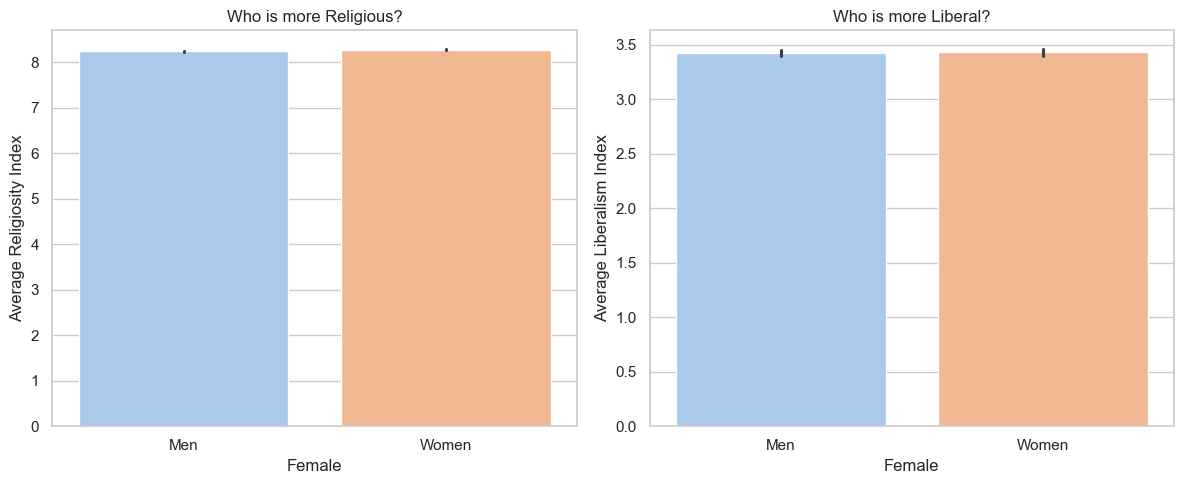

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

gender_analysis = df_check.groupby('Female')[['Religiosity_Index', 'Liberalism_Index']].mean()

print("Averages by gender (0=man, 1=woman):")
print(gender_analysis)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=df_check['Female'], y=df_check['Religiosity_Index'], palette='pastel')
plt.title('Who is more Religious?')
plt.xticks([0, 1], ['Men', 'Women'])
plt.ylabel('Average Religiosity Index')

plt.subplot(1, 2, 2)
sns.barplot(x=df_check['Female'], y=df_check['Liberalism_Index'], palette='pastel')
plt.title('Who is more Liberal?')
plt.xticks([0, 1], ['Men', 'Women'])
plt.ylabel('Average Liberalism Index')

plt.tight_layout()
plt.show()

**Insight:**
As shown in the bar charts, women in our dataset exhibit a higher average **Religiosity Index** compared to men. Since Religiosity was identified as the strongest driver of conservatism, the model likely captured this indirect effect. Thus, the "conservatism" associated with gender is actually a reflection of higher religious adherence among the female respondents in this sample.

## Logistic Regression (Classification)

The Process:
- Define Target: Convert the continuous Liberalism_Index into a binary category (Is_Liberal).
    - 1 (Liberal): Score is above the median.
    - 0 (Conservative): Score is below the median.
- Train Model: Use Logistic Regression to learn the patterns.
- Evaluate: Use a Confusion Matrix (to see where we made mistakes) and ROC-AUC (to measure the model's accuracy).

#### Baseline Model Establishment: Initial Logistic Regression Performance

Median Liberalism Score: 3.0
Class Balance (Target Distribution):
Is_Liberal
0    0.508485
1    0.491515
Name: proportion, dtype: float64
Total features after one-hot encoding: 10

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.58      0.66      0.62      5160
           1       0.59      0.50      0.54      4988

    accuracy                           0.58     10148
   macro avg       0.58      0.58      0.58     10148
weighted avg       0.58      0.58      0.58     10148

ROC-AUC Score: 0.611 (1.0 is perfect, 0.5 is random guessing)


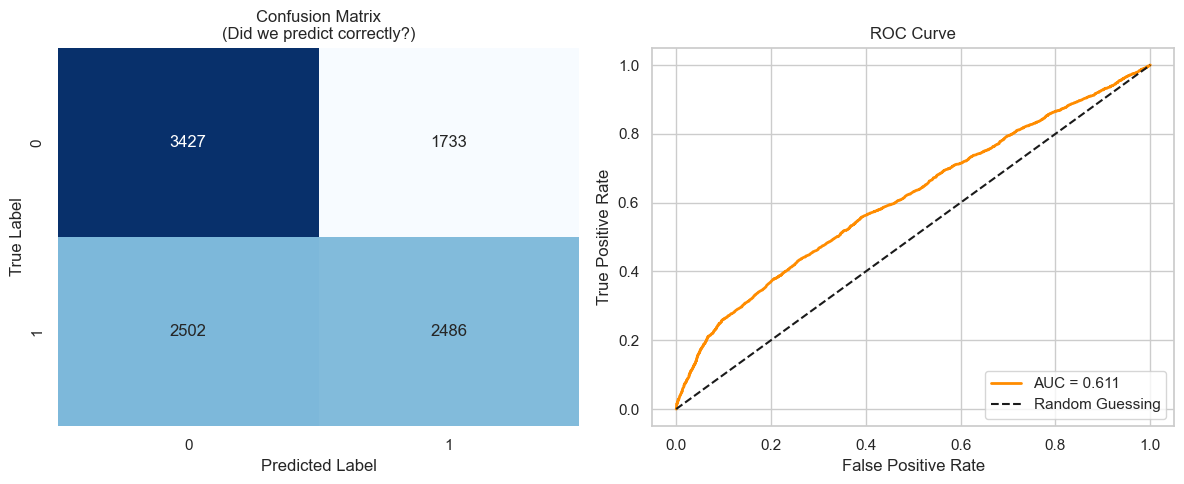

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# 1. Prepare Data
df_log = df_clean.copy()
df_log['Female'] = (df_log['Gender'] == 2).astype(int)

# Create Binary Target: Split based on the Median
median_val = df_log['Liberalism_Index'].median()
df_log['Is_Liberal'] = (df_log['Liberalism_Index'] > median_val).astype(int)

print(f"Median Liberalism Score: {median_val}")
print(f"Class Balance (Target Distribution):\n{df_log['Is_Liberal'].value_counts(normalize=True)}")

# 2. Define Features (X) and Target (y)
# Numeric features will be scaled, Education will be one-hot encoded
numeric_features = ['Religiosity_Index', 'Age', 'Female']
categorical_features = ['Education']

X = df_log[numeric_features + categorical_features]
y = df_log['Is_Liberal']

# Split into Train/Test (stratify keeps class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Train Logistic Regression using preprocessing pipeline
# - Standardize numeric variables for stable optimization
# - One-hot encode Education to avoid assuming a linear effect
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("edu", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

log_model = Pipeline([
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=1000))
])

log_model.fit(X_train, y_train)
print("Total features after one-hot encoding:",
      log_model.named_steps["preprocess"].get_feature_names_out().shape[0])

# 4. Predictions
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

# 5. Evaluation Metrics
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

auc_score = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {auc_score:.3f} (1.0 is perfect, 0.5 is random guessing)")

# 6. Visualizations
plt.figure(figsize=(12, 5))

# Confusion Matrix Heatmap
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix\n(Did we predict correctly?)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# ROC Curve
plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}", color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

#### Data Preprocessing: Noise Reduction & Class Separation Strategy

In [44]:
# --- PREPARATION FOR ADVANCED MODELS (Data Filtering) ---
from sklearn.ensemble import RandomForestClassifier

# We filter out the "neutral" middle to help the model learn better
df_model = df_clean.copy()
df_model['Female'] = (df_model['Gender'] == 2).astype(int)

low_threshold = df_model['Liberalism_Index'].quantile(0.33)
high_threshold = df_model['Liberalism_Index'].quantile(0.67)

conservatives = df_model[df_model['Liberalism_Index'] <= low_threshold].copy()
liberals = df_model[df_model['Liberalism_Index'] >= high_threshold].copy()

conservatives['Is_Liberal'] = 0
liberals['Is_Liberal'] = 1
features = ['Religiosity_Index', 'Age', 'Education', 'Female']


df_final = pd.concat([conservatives, liberals])
X = df_final[features]
y = df_final['Is_Liberal']

print("Data Filtered: Middle 33% removed for clearer separation.")

Data Filtered: Middle 33% removed for clearer separation.


#### Option A: Enhanced Generalization via Adjusted Train-Test Split (80/20)

To enhance the model’s ability to generalize and capture complex patterns within the survey data, we adjusted the train-test split ratio from 70:30 to 80:20. This increases the training data available while maintaining a sufficiently large test set for evaluation.


--- Option A: 80% Training Data ---
              precision    recall  f1-score   support

           0       0.62      0.85      0.72      2825
           1       0.66      0.36      0.47      2277

    accuracy                           0.63      5102
   macro avg       0.64      0.61      0.59      5102
weighted avg       0.64      0.63      0.61      5102

Option A ROC-AUC: 0.654


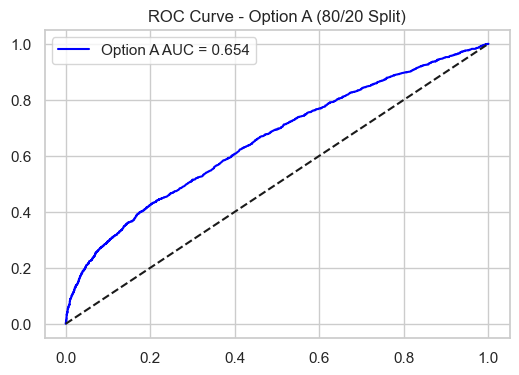

In [61]:
# --- OPTION A: 80/20 Split (No Class Weights) ---

# 1. Split Data: 80% Train, 20% Test
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Train Model (Standard Random Forest)
rf_model_A = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
rf_model_A.fit(X_train_A, y_train_A)

# 3. Evaluate
y_pred_A = rf_model_A.predict(X_test_A)
y_prob_A = rf_model_A.predict_proba(X_test_A)[:, 1]

print("\n--- Option A: 80% Training Data ---")
print(classification_report(y_test_A, y_pred_A))
print(f"Option A ROC-AUC: {roc_auc_score(y_test_A, y_prob_A):.3f}")

# Plot
plt.figure(figsize=(6, 4))
fpr, tpr, _ = roc_curve(y_test_A, y_prob_A)
plt.plot(fpr, tpr, label=f"Option A AUC = {roc_auc_score(y_test_A, y_prob_A):.3f}", color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Option A (80/20 Split)')
plt.legend()
plt.show()

#### Option B: Addressing Class Imbalance with Algorithmic Weighting

To address potential class imbalance, we applied balanced class weights while maintaining the original 70:30 split. This penalizes the model more heavily for misclassifying the minority class, improving sensitivity when predicting Liberal vs. Conservative moral values.


--- Option B: Balanced Weights (70/30 Split) ---
              precision    recall  f1-score   support

           0       0.63      0.80      0.71      4238
           1       0.63      0.42      0.51      3415

    accuracy                           0.63      7653
   macro avg       0.63      0.61      0.61      7653
weighted avg       0.63      0.63      0.62      7653

Option B ROC-AUC: 0.653


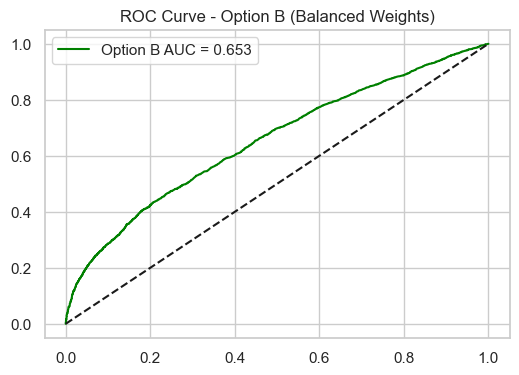

In [62]:
# --- OPTION B: Balanced Weights (Original 70/30 Split) ---

# 1. Split Data: Back to Standard 70% Train, 30% Test (IGNORING Option A)
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 2. Train Model (With 'balanced' weights)
rf_model_B = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,
    class_weight='balanced',  # <--- The ONLY change here
    random_state=42
)
rf_model_B.fit(X_train_B, y_train_B)

# 3. Evaluate
y_pred_B = rf_model_B.predict(X_test_B)
y_prob_B = rf_model_B.predict_proba(X_test_B)[:, 1]

print("\n--- Option B: Balanced Weights (70/30 Split) ---")
print(classification_report(y_test_B, y_pred_B))
print(f"Option B ROC-AUC: {roc_auc_score(y_test_B, y_prob_B):.3f}")

# Plot
plt.figure(figsize=(6, 4))
fpr, tpr, _ = roc_curve(y_test_B, y_prob_B)
plt.plot(fpr, tpr, label=f"Option B AUC = {roc_auc_score(y_test_B, y_prob_B):.3f}", color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Option B (Balanced Weights)')
plt.legend()
plt.show()

#### Option C: Comprehensive Optimization (Combined Strategy) & Final Comparison

By combining the expanded 80:20 training split with balanced class weights, we achieved the best performance. This strategy leverages more data for learning while maintaining sensitivity to both classes (Liberal vs. Conservative).


--- Option C: Combination (Best Performance) ---
              precision    recall  f1-score   support

           0       0.63      0.80      0.71      2825
           1       0.63      0.43      0.51      2277

    accuracy                           0.63      5102
   macro avg       0.63      0.61      0.61      5102
weighted avg       0.63      0.63      0.62      5102

Option C ROC-AUC: 0.655


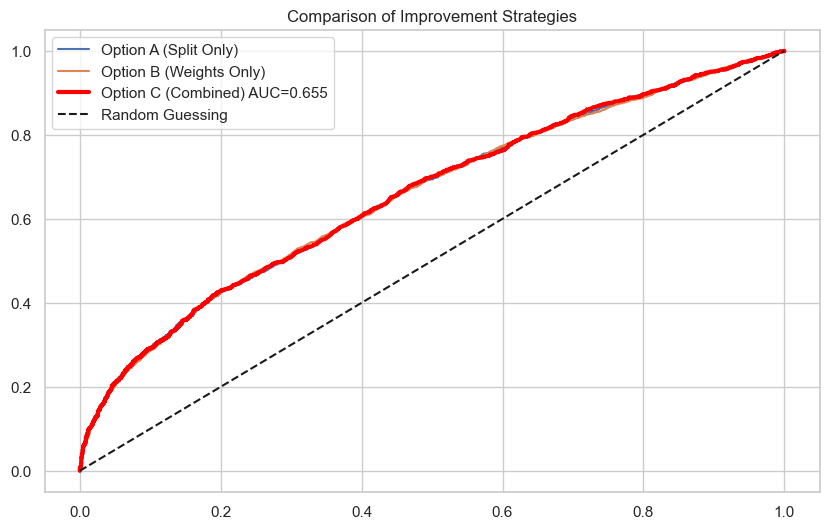

In [63]:
# --- OPTION C: The Combination (80/20 Split + Balanced Weights) ---

# 1. Split Data: 80% Train (Like Option A)
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Train Model: Balanced Weights (Like Option B)
rf_model_C = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,
    class_weight='balanced',
    random_state=42
)
rf_model_C.fit(X_train_C, y_train_C)

# 3. Evaluate
y_pred_C = rf_model_C.predict(X_test_C)
y_prob_C = rf_model_C.predict_proba(X_test_C)[:, 1]

print("\n--- Option C: Combination (Best Performance) ---")
print(classification_report(y_test_C, y_pred_C))
print(f"Option C ROC-AUC: {roc_auc_score(y_test_C, y_prob_C):.3f}")

# Final Comparison Plot
plt.figure(figsize=(10, 6))
plt.plot(*roc_curve(y_test_A, y_prob_A)[:2], label="Option A (Split Only)")
plt.plot(*roc_curve(y_test_B, y_prob_B)[:2], label="Option B (Weights Only)")
plt.plot(*roc_curve(y_test_C, y_prob_C)[:2], label=f"Option C (Combined) AUC={roc_auc_score(y_test_C, y_prob_C):.3f}",
         linewidth=3, color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.title('Comparison of Improvement Strategies')
plt.legend()
plt.show()

## K-Means Clustering

### Unsupervised Learning: K-Means Clustering of Countries
We cluster **countries** (not individual respondents) based on their **average religiosity and liberalism indices**.
Because K-Means is distance-based, we standardize both features before clustering.


In [79]:
import numpy as np
from sklearn.preprocessing import StandardScaler

df_countries = df_clean.groupby('Country_Name')[['Religiosity_Index', 'Liberalism_Index']].mean().reset_index()

X = df_countries[['Religiosity_Index', 'Liberalism_Index']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2-letter labels (as before)
df_countries['CC'] = df_countries['Country_Name'].astype(str).str.upper().str[:2]

# Feature scaling (recommended for distance-based clustering like K-Means)
X = df_countries[['Religiosity_Index', 'Liberalism_Index']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Choosing k (Elbow + Silhouette)
We evaluate several values of k:
- **Elbow/Inertia**: within-cluster compactness (lower is better, look for a “knee”).
- **Silhouette**: cluster separation (higher is better).

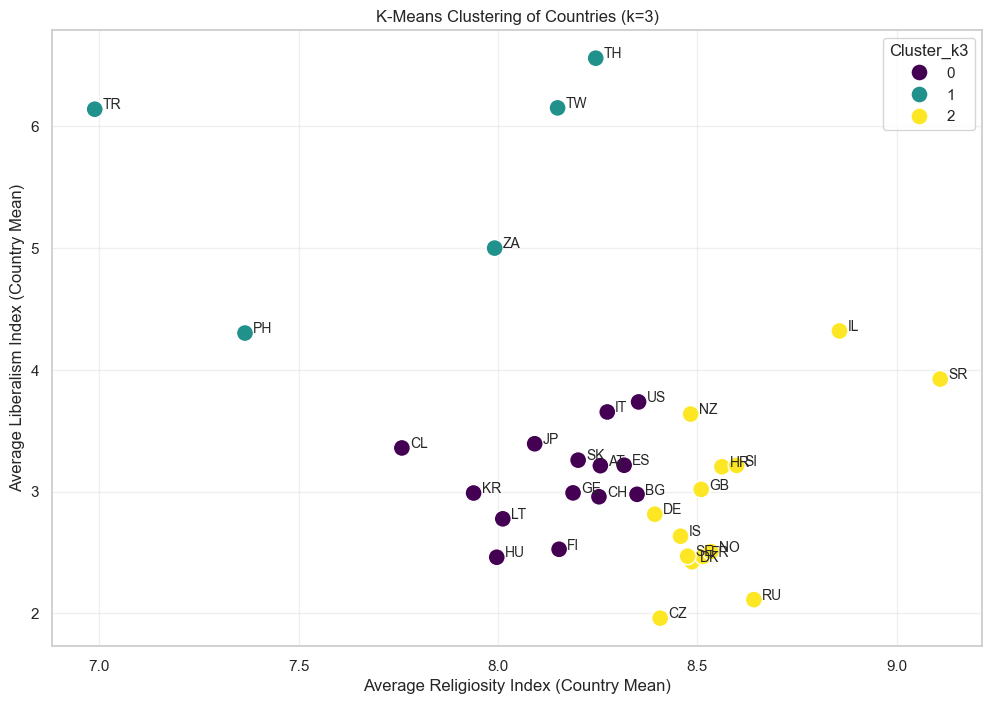

In [80]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

kmeans_3 = KMeans(n_clusters=3, random_state=7, n_init=10)
df_countries['Cluster_k3'] = kmeans_3.fit_predict(X_scaled)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_countries,
    x='Religiosity_Index',
    y='Liberalism_Index',
    hue='Cluster_k3',
    palette='viridis',
    s=150
)

for i in range(df_countries.shape[0]):
    plt.text(
        x=df_countries.Religiosity_Index[i] + 0.02,
        y=df_countries.Liberalism_Index[i],
        s=str(df_countries.Country_Name[i])[:2].upper(),
        size='small'
    )

plt.title("K-Means Clustering of Countries (k=3)")
plt.xlabel("Average Religiosity Index (Country Mean)")
plt.ylabel("Average Liberalism Index (Country Mean)")
plt.grid(True, alpha=0.3)
plt.show()

### Clustering with k=3 (Interpretability Choice)
Although silhouette suggests **k=2** is best-separated, we also examine **k=3** to provide a richer, more interpretable country typology (e.g., low/medium/high patterns).

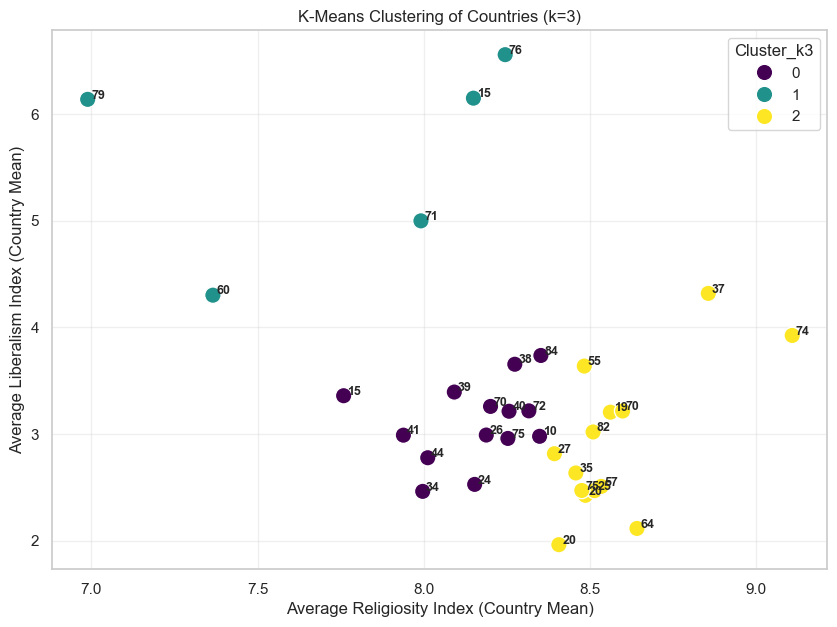

In [76]:
import seaborn as sns

kmeans_3 = KMeans(n_clusters=3, random_state=7, n_init=10)
df_countries['Cluster_k3'] = kmeans_3.fit_predict(X_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_countries,
    x='Religiosity_Index',
    y='Liberalism_Index',
    hue='Cluster_k3',
    palette='viridis',
    s=140
)


# Add 2-letter country labels (as before)
for _, row in df_countries.iterrows():
    plt.text(
        row['Religiosity_Index'] + 0.01,
        row['Liberalism_Index'] + 0.01,
        row['CC'],
        fontsize=9,
        fontweight='bold'
    )

plt.title("K-Means Clustering of Countries (k=3)")
plt.xlabel("Average Religiosity Index (Country Mean)")
plt.ylabel("Average Liberalism Index (Country Mean)")
plt.grid(alpha=0.3)
plt.show()

### Clustering with k=2 (Best Separation by Silhouette)
We now fit K-Means with **k=2**, which achieved the highest silhouette score, and compare the resulting grouping.

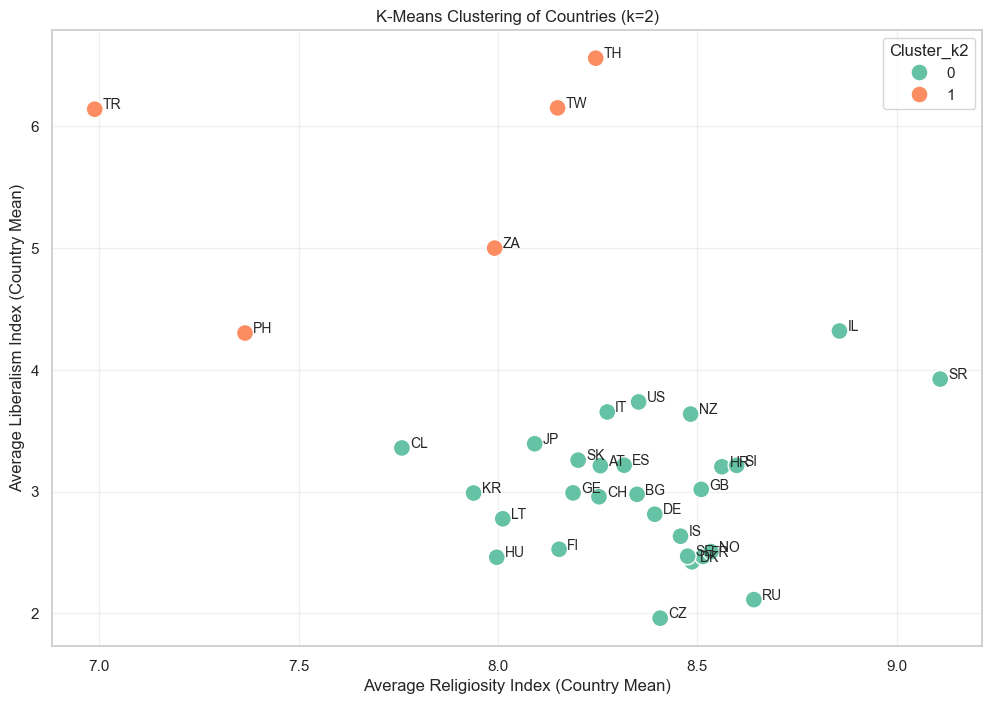

In [81]:
kmeans_2 = KMeans(n_clusters=2, random_state=7, n_init=10)
df_countries['Cluster_k2'] = kmeans_2.fit_predict(X_scaled)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_countries,
    x='Religiosity_Index',
    y='Liberalism_Index',
    hue='Cluster_k2',
    palette='Set2',
    s=150
)

for i in range(df_countries.shape[0]):
    plt.text(
        x=df_countries.Religiosity_Index[i] + 0.02,
        y=df_countries.Liberalism_Index[i],
        s=str(df_countries.Country_Name[i])[:2].upper(),
        size='small'
    )

plt.title("K-Means Clustering of Countries (k=2)")
plt.xlabel("Average Religiosity Index (Country Mean)")
plt.ylabel("Average Liberalism Index (Country Mean)")
plt.grid(True, alpha=0.3)
plt.show()

## Clustering Summary (Country-Level)
We clustered countries based on their **average religiosity and liberalism indices**, after standardizing both features to ensure fair distance calculations in K-Means.

**Model selection:** The silhouette score was highest at **k=2**, indicating the clearest separation into two country profiles in this 2D space.

**Interpretability vs. separation:** We also examined **k=3** as an interpretable alternative typology that can reveal a potential intermediate group, even if separation is not as strong as k=2.

Overall, the country-level clustering supports the pattern seen in the supervised models: higher average religiosity tends to align with lower average liberalism, while lower religiosity aligns with higher liberalism.